# Illustrations for Isolation Forest algorithm

In [1]:
import json

import numpy as np
import pandas as pd

from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('config.json', 'r') as config_file:
    config = json.load(config_file)

In [3]:
BASE_COLOR = config['base_color']
LIGHT_COLOR = config['light_color']
DPI = config['dpi']
EDGE_COLOR = config['edge_color']

In [4]:
palette = f"blend:{BASE_COLOR},{LIGHT_COLOR}"

In [5]:
np.random.seed(42)

In [6]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_context("talk")

In [7]:
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]

In [8]:
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)

In [9]:
offset = 3

In [10]:
X1 = 0.5 * np.random.randn(n_inliers) + offset
X2 = 0.5 * np.random.randn(n_inliers) - offset

In [11]:
outliers_1 = np.random.uniform(low=-6, high=6, size=(n_outliers))
outliers_2 = np.random.uniform(low=-6, high=6, size=(n_outliers))

In [12]:
data = pd.concat([pd.DataFrame({'попугаи': X1, 'удавы': X2}), 
                  pd.DataFrame({'попугаи': outliers_1, 'удавы': outliers_2})])

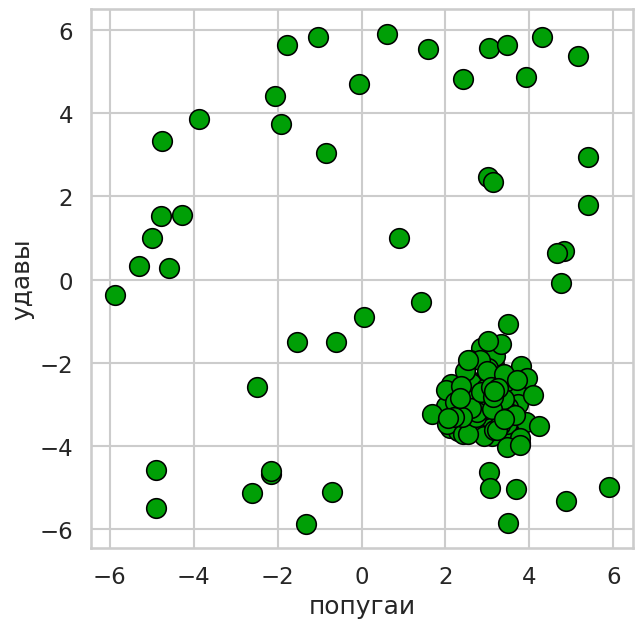

In [13]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data, x='попугаи', y='удавы', color=BASE_COLOR, s=200, edgecolor=EDGE_COLOR)
plt.savefig("images/iforest_initial_data.png", transparent=True, dpi=DPI)

In [14]:
sample = data.sample(70, random_state=42).copy()

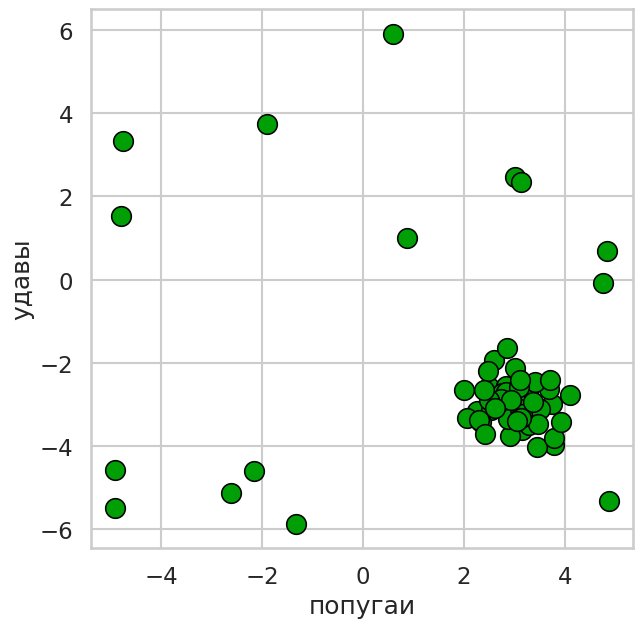

In [15]:
plt.figure(figsize=(7, 7))
sns.scatterplot(sample, x='попугаи', y='удавы', color=BASE_COLOR, s=200, edgecolor=EDGE_COLOR)
plt.savefig("images/iforest_sample.png", transparent=True, dpi=DPI)

In [16]:
first_split = 3.954197818641566
second_split = -3.7345546743319455
third_split = 4.55352143693694
forth_split = -0.6572094533790986

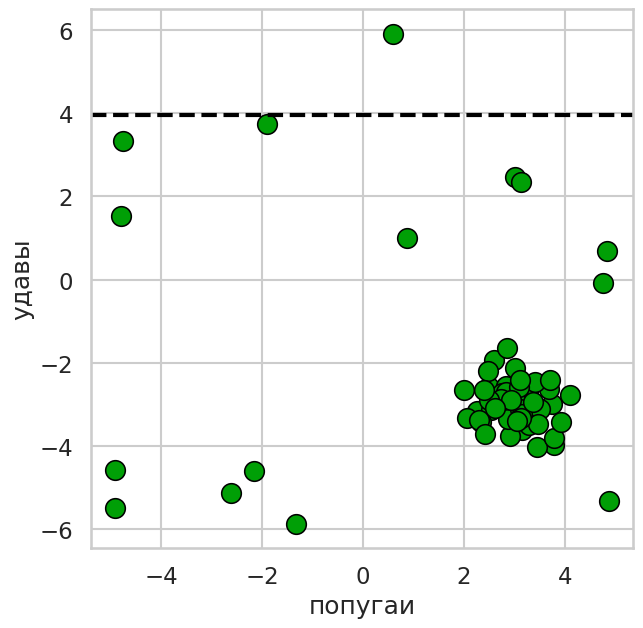

In [17]:
plt.figure(figsize=(7, 7))
sns.scatterplot(sample, x='попугаи', y='удавы', color=BASE_COLOR, s=200, edgecolor=EDGE_COLOR)
plt.axhline(first_split, linestyle='--', color='black', linewidth=3)
plt.savefig("images/iforest_first_split.png", transparent=True, dpi=DPI)

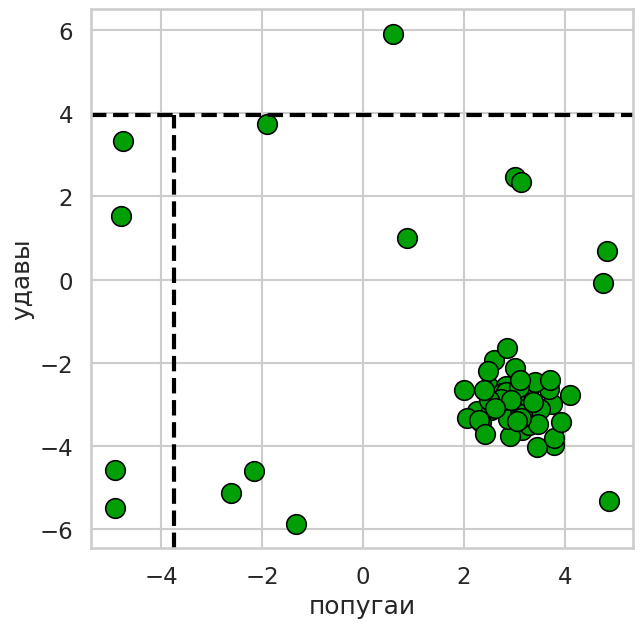

In [18]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(sample, x='попугаи', y='удавы', color=BASE_COLOR, s=200, edgecolor=EDGE_COLOR)
bounds = ax.viewLim.bounds
plt.axhline(first_split, linestyle='--', color='black', linewidth=3)
plt.axvline(x=second_split, ymin = 0.0, ymax = - (bounds[1] -  first_split) / bounds[3], linestyle='--', color='black', linewidth=3)
plt.savefig("images/iforest_second_split.png", transparent=True, dpi=DPI)

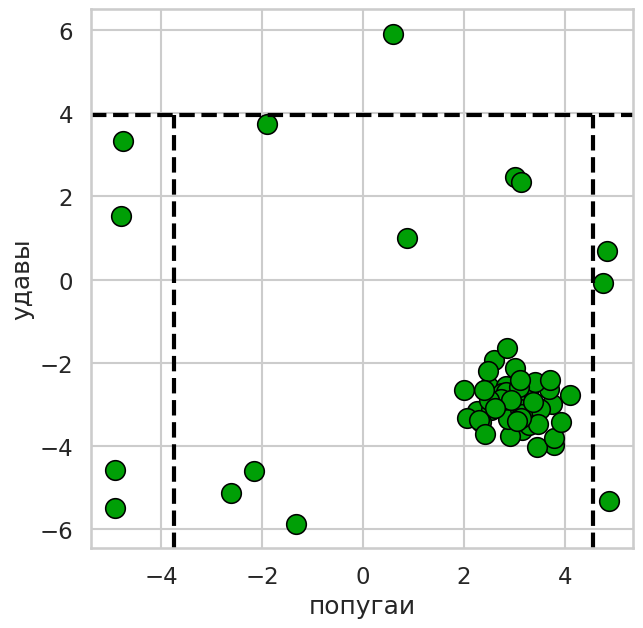

In [19]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(sample, x='попугаи', y='удавы', color=BASE_COLOR, s=200, edgecolor=EDGE_COLOR)
bounds = ax.viewLim.bounds
first_splot_pos = - (bounds[1] -  first_split) / bounds[3]
plt.axhline(first_split, linestyle='--', color='black', linewidth=3)
plt.axvline(x=second_split, ymin = 0.0, ymax = first_splot_pos, linestyle='--', color='black', linewidth=3)
plt.axvline(x=third_split, ymin = 0., ymax = first_splot_pos, linestyle='--', color='black', linewidth=3)
plt.savefig("images/iforest_third_split.png", transparent=True, dpi=DPI)

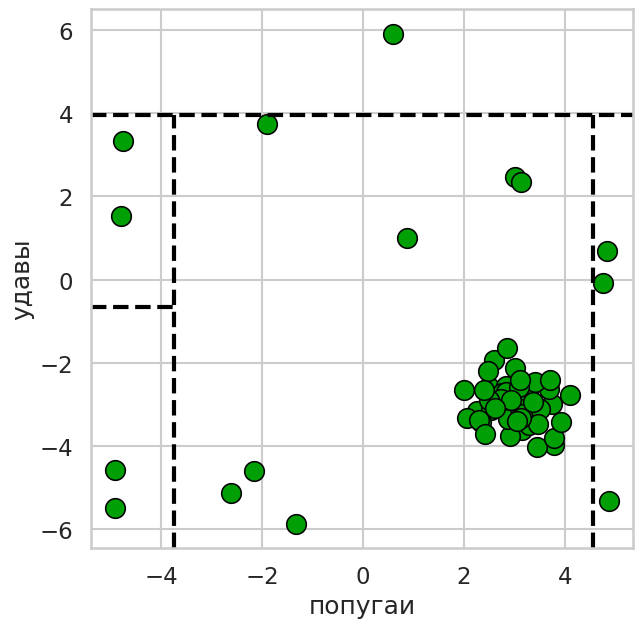

In [20]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(sample, x='попугаи', y='удавы', color=BASE_COLOR, s=200, edgecolor=EDGE_COLOR)
bounds = ax.viewLim.bounds
first_splot_pos = - (bounds[1] -  first_split) / bounds[3]
second_split_pos = abs(second_split - bounds[0]) / bounds[2]
plt.axhline(first_split, linestyle='--', color='black', linewidth=3)
plt.axvline(x=second_split, ymin = 0.0, ymax = first_splot_pos, linestyle='--', color='black', linewidth=3)
plt.axvline(x=third_split, ymin = 0., ymax = first_splot_pos, linestyle='--', color='black', linewidth=3)
plt.axhline(y=forth_split, xmin=0., xmax=second_split_pos, linestyle='--', color='black', linewidth=3)
plt.savefig("images/iforest_forth_split.png", transparent=True, dpi=DPI)

In [21]:
clf = IsolationForest(random_state=0)

In [22]:
clf.fit(data)

IsolationForest(random_state=0)

In [23]:
scores = - clf.score_samples(data) # negative scores to get anomaly score as in pyOD

/home/michael/git/phd-2025-anomaly-detection/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


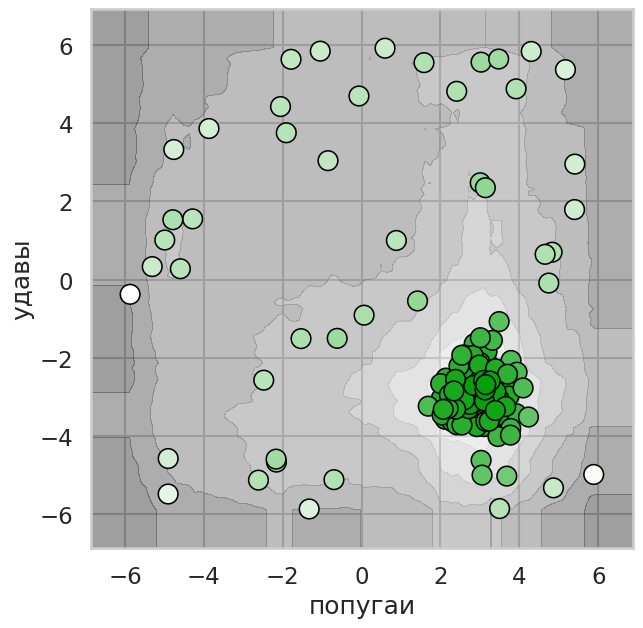

In [24]:
plt.figure(figsize=(7, 7))
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    data.values,
    plot_method='contourf',
    response_method="decision_function",
    alpha=0.4,
    ax=ax,
    cmap='Greys_r'
)
sns.scatterplot(data, x='попугаи', y='удавы', s=200, ax=ax, hue=scores, 
                palette=sns.color_palette(palette, as_cmap=True), legend=False, edgecolor=EDGE_COLOR)
plt.savefig("images/iforest_decision_boundary.png", transparent=True, dpi=DPI)

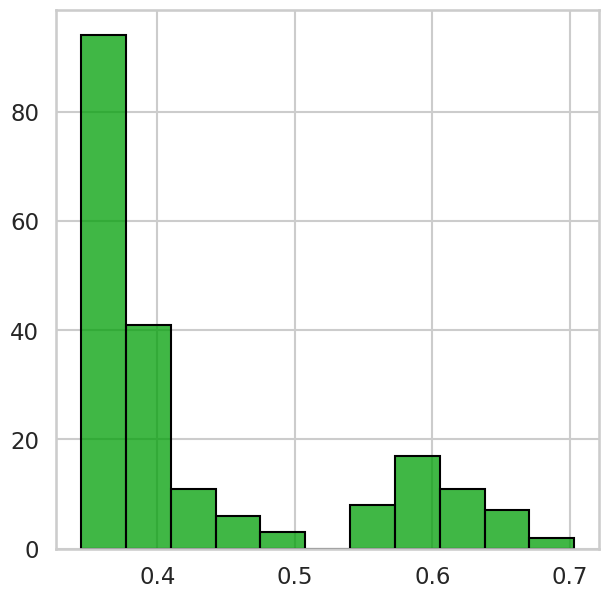

In [25]:
plt.figure(figsize=(7, 7))
ax = sns.histplot(scores, color=BASE_COLOR, edgecolor=EDGE_COLOR)
ax.set(ylabel='')
plt.savefig("images/iforest_score_histogram.png", transparent=True, dpi=DPI)